In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sns.set(style="whitegrid")


In [2]:
url = "https://raw.githubusercontent.com/danielvieira95/Intelig-ncia-Artificial-e-Big-Data--2-2024/febab8ea75e14943d9f4c12223e42cabdbba9c74/Bases%20de%20dados/dadosacoes.csv"

df = pd.read_csv(url)
df.head()


,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


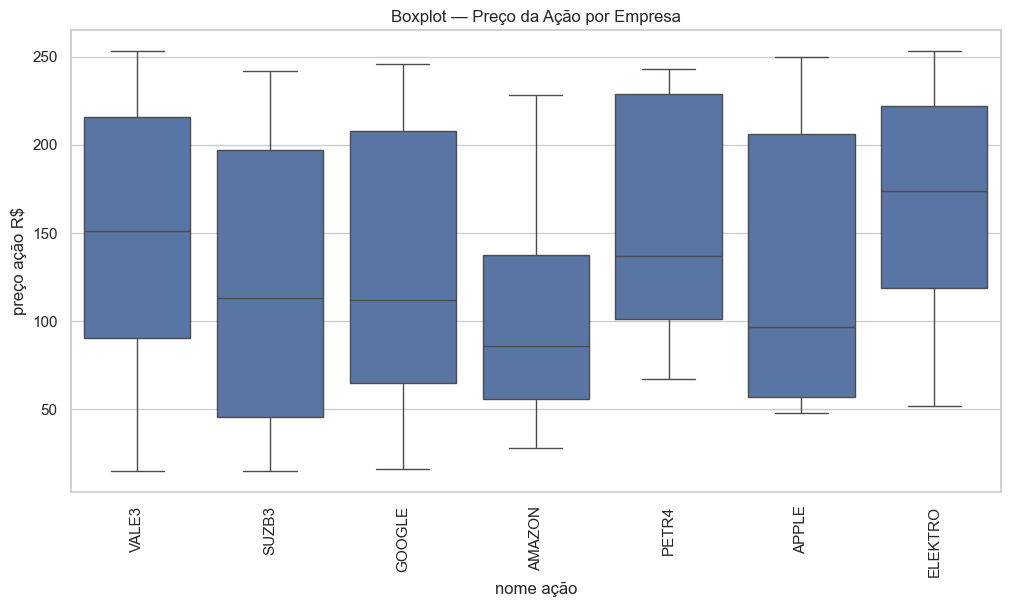

In [5]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="nome ação", y="preço ação R$")
plt.xticks(rotation=90)
plt.title("Boxplot — Preço da Ação por Empresa")
plt.show()


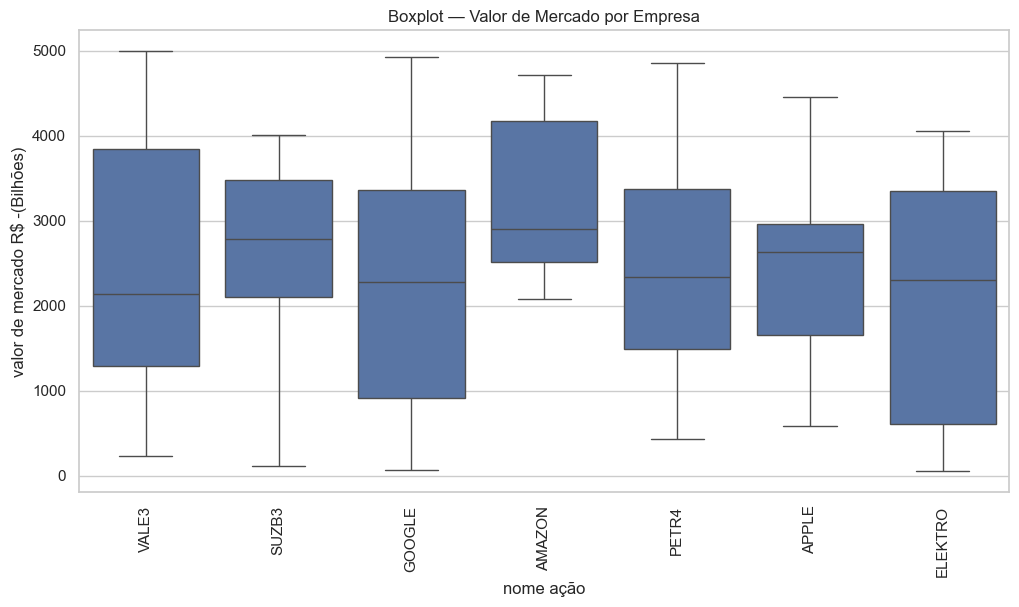

In [6]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="nome ação", y="valor de mercado R$ -(Bilhões)")
plt.xticks(rotation=90)
plt.title("Boxplot — Valor de Mercado por Empresa")
plt.show()


In [9]:
df_clean = df.dropna()

df_dummies = pd.get_dummies(df_clean, columns=["nome ação"], drop_first=True)

X = df_clean[["preço ação R$", "qtde cotas", "valor de mercado R$ -(Bilhões)"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
kmeans4 = KMeans(n_clusters=4, random_state=42)
df_clean["cluster4"] = kmeans4.fit_predict(X_scaled)
df_clean.head()


,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),cluster4
0,VALE3,194,45,2134,3
1,SUZB3,91,71,3069,1
2,SUZB3,165,41,2815,0
3,SUZB3,56,34,3613,0
4,GOOGLE,212,9,2975,0


In [11]:
kmeans5 = KMeans(n_clusters=5, random_state=42)
df_clean["cluster5"] = kmeans5.fit_predict(X_scaled)


In [12]:
kmeans8 = KMeans(n_clusters=8, random_state=42)
df_clean["cluster8"] = kmeans8.fit_predict(X_scaled)


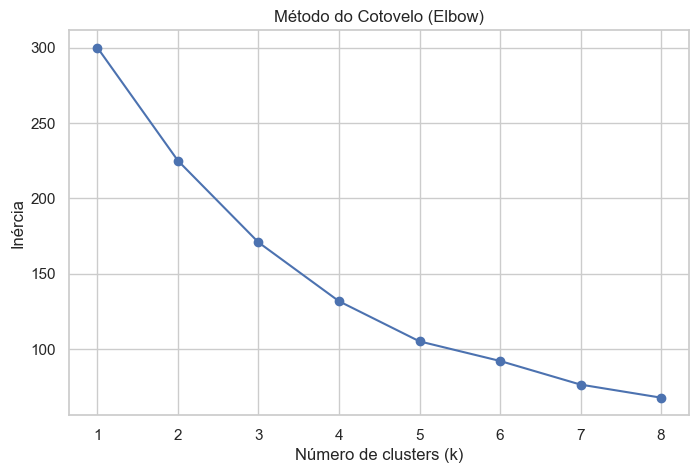

In [13]:
inercia = []
ks = range(1, 9)

for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inercia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(ks, inercia, marker='o')
plt.title("Método do Cotovelo (Elbow)")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia")
plt.show()


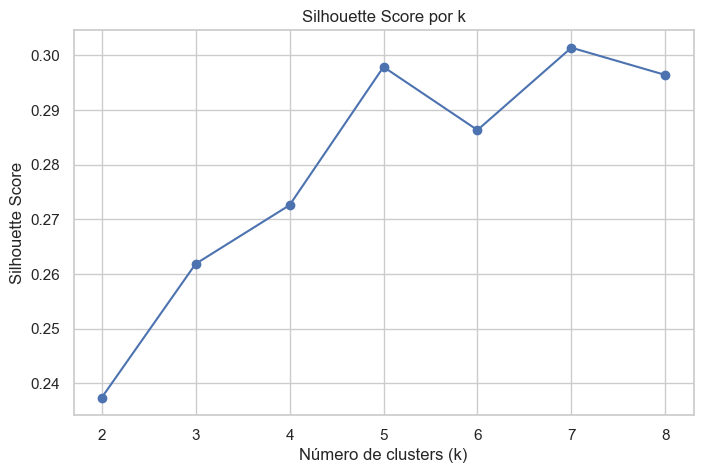

In [14]:
sil = []

for k in range(2, 9):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(8,5))
plt.plot(range(2, 9), sil, marker='o')
plt.title("Silhouette Score por k")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


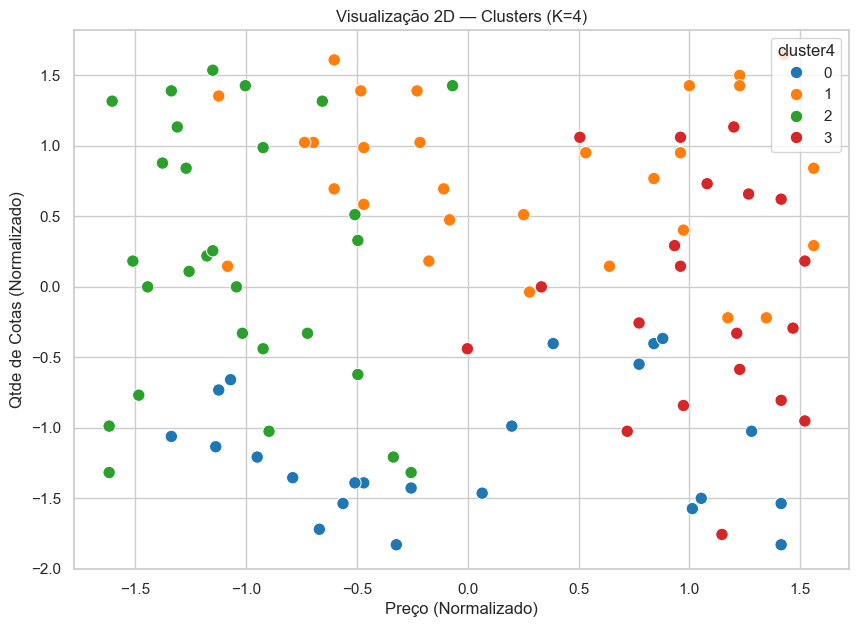

In [15]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    x=X_scaled[:,0],
    y=X_scaled[:,1],
    hue=df_clean["cluster4"],
    palette="tab10",
    s=80
)
plt.xlabel("Preço (Normalizado)")
plt.ylabel("Qtde de Cotas (Normalizado)")
plt.title("Visualização 2D — Clusters (K=4)")
plt.show()


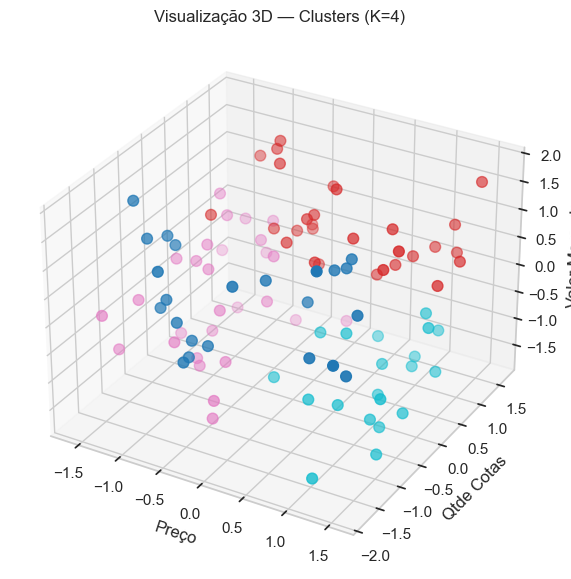

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_scaled[:,0],
    X_scaled[:,1],
    X_scaled[:,2],
    c=df_clean["cluster4"],
    s=60,
    cmap="tab10"
)

ax.set_xlabel("Preço")
ax.set_ylabel("Qtde Cotas")
ax.set_zlabel("Valor Mercado")
plt.title("Visualização 3D — Clusters (K=4)")
plt.show()
